In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p data/kitti/train/ data/kitti/val/ data/output/ data/models

In [ ]:
!cp /content/drive/MyDrive/MDE-PyT-master/*.py .

In [ ]:
TSRC_1="/content/drive/MyDrive/DataSet/KImages/data/kitti/train/2011_09_26_drive_0001_sync"
TSRC_2="/content/drive/MyDrive/DataSet/KImages/data/kitti/val/2011_09_26_drive_0020_sync"

TDEST="/content/data/kitti/train/2011_09_26_drive_0001_sync"
VDEST="/content/data/kitti/val/2011_09_26_drive_0020_sync"

!mkdir -p $TDEST/image_02/data/  $VDEST/image_02/data/
!mkdir -p $TDEST/image_03/data/  $VDEST/image_03/data/
!mkdir -p data/test/left/image_02/data  #Testing

!ls -l $TSRC_1/image_03/data/*.png | wc -l 
!ls -l $TSRC_2/image_02/data/*.png | wc -l
!echo "----------------------------------------------------------"
!echo "Training"
!cp $TSRC_1/image_02/data/*0[0-7][0-9].png $TDEST/image_02/data/
!cp $TSRC_1/image_03/data/*0[0-7][0-9].png $TDEST/image_03/data/
!cp $TSRC_2/image_02/data/*[0-5][0-9].png  $TDEST/image_02/data/
!cp $TSRC_2/image_03/data/*[0-5][0-9].png  $TDEST/image_03/data/
!ls -l $TDEST/image_02/data/*.png | wc -l
!ls -l $TDEST/image_03/data/*.png | wc -l

!echo "----------------------------------------------------------"
!echo "Validation"
!cp $TSRC_1/image_02/data/*08[0-9].png $VDEST/image_02/data/
!cp $TSRC_1/image_03/data/*08[0-9].png $VDEST/image_03/data/
!cp $TSRC_2/image_02/data/*06[0-9].png $VDEST/image_02/data/
!cp $TSRC_2/image_03/data/*06[0-9].png $VDEST/image_03/data/
!ls -l $VDEST/image_02/data/*.png | wc -l
!ls -l $VDEST/image_03/data/*.png | wc -l

!echo "----------------------------------------------------------"
!echo "Testing"
!cp $TSRC_1/image_02/data/*09[0-9].png data/test/left/image_02/data/
!cp $TSRC_2/image_02/data/*07[0-9].png data/test/left/image_02/data/
!ls -l data/test/left/image_02/data/*.png | wc -l
!echo "----------------------------------------------------------"

108
86
----------------------------------------------------------
Training
80
80
----------------------------------------------------------
Validation
20
20
----------------------------------------------------------
Testing
20
----------------------------------------------------------


In [ ]:
import os
import torch
import numpy as np
import skimage.transform
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

from main_monodepth_pytorch import Model
%reload_ext autoreload
%autoreload 2

## Train

Check if CUDA is available

In [ ]:
torch.cuda.is_available()

True

In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.cuda.empty_cache()

In [ ]:
!ls data/kitti/train/ data/kitti/val/

data/kitti/train/:
2011_09_26_drive_0001_sync

data/kitti/val/:
2011_09_26_drive_0020_sync


In [ ]:
dict_parameters = edict({'data_dir':'data/kitti/train/',
                         'val_data_dir':'data/kitti/val/',
                         'model_path':'data/models/monodepth_resnet18_001.pth',
                         'output_directory':'data/output/',
                         'input_height':256,
                         'input_width':512,
                         'model':'resnet18_md',
                         'pretrained':True,
                         'mode':'train',
                         'epochs':20,                          #Jag --------200,
                         'learning_rate':1e-4,
                         'batch_size': 8,
                         'adjust_lr':True,
                         'device':'cuda:0',
                         'do_augmentation':True,
                         'augment_parameters':[0.8, 1.2, 0.5, 2.0, 0.8, 1.2],
                         'print_images':False,
                         'print_weights':False,
                         'input_channels': 3,
                         'num_workers': 4,             #Jag --------8,
                         'use_multiple_gpu': False})

In [ ]:
model = Model(dict_parameters)
#model.load('data/models/monodepth_resnet18_001_last.pth')

data/kitti/val/ : Use a dataset with 20 images
data/kitti/train/ : Use a dataset with 80 images


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
model.train()

Val_loss: 4.168120098114014
Epoch: 1 train_loss: 3.545131969451904 val_loss: 3.292558193206787 time: 6.599 s
Model_saved
Epoch: 2 train_loss: 3.1999529123306276 val_loss: 3.7438028335571287 time: 5.264 s
Epoch: 3 train_loss: 3.028488564491272 val_loss: 3.631973457336426 time: 5.314 s
Epoch: 4 train_loss: 2.9747159004211428 val_loss: 3.653149700164795 time: 5.267 s
Epoch: 5 train_loss: 2.8855631351470947 val_loss: 3.537218475341797 time: 5.339 s
Epoch: 6 train_loss: 2.894141602516174 val_loss: 3.513671398162842 time: 5.474 s
Epoch: 7 train_loss: 2.82169394493103 val_loss: 3.5123242378234862 time: 5.498 s
Epoch: 8 train_loss: 2.8270046949386596 val_loss: 3.536368179321289 time: 5.307 s
Epoch: 9 train_loss: 2.792129898071289 val_loss: 3.4826447486877443 time: 5.453 s
Epoch: 10 train_loss: 2.7825637340545653 val_loss: 3.499997043609619 time: 5.521 s
Epoch: 11 train_loss: 2.736595368385315 val_loss: 3.427457809448242 time: 5.371 s
Epoch: 12 train_loss: 2.781619906425476 val_loss: 3.42070608

In [ ]:
!ls -l /content/data/models

total 237536
-rw-r--r-- 1 root root 81077174 Jan 27 10:32 monodepth_resnet18_001_cpt.pth
-rw-r--r-- 1 root root 81077463 Jan 27 10:33 monodepth_resnet18_001_last.pth
-rw-r--r-- 1 root root 81076018 Jan 27 10:33 monodepth_resnet18_001.pth


## Test the model

In [ ]:
dict_parameters_test = edict({'data_dir':'data/test',
                              'model_path':'data/models/monodepth_resnet18_001_cpt.pth',
                              'output_directory':'data/output/',
                              'input_height':256,
                              'input_width':512,
                              'model':'resnet18_md',
                              'pretrained':False,
                              'mode':'test',
                              'device':'cuda:0',
                              'input_channels':3,
                              'num_workers':4,
                              'use_multiple_gpu':False})
model_test = Model(dict_parameters_test)

data/test : Use a dataset with 20 images


In [ ]:
model_test.test()

Finished Testing


In [ ]:
!ls -l /content/data/output/

total 20488
-rw-r--r-- 1 root root 10485888 Jan 27 10:33 disparities.npy
-rw-r--r-- 1 root root 10485888 Jan 27 10:33 disparities_pp.npy


In [ ]:
disp = np.load('data/output/disparities_pp.npy')  # Or disparities.npy for output without post-processing
disp.shape

(20, 256, 512)

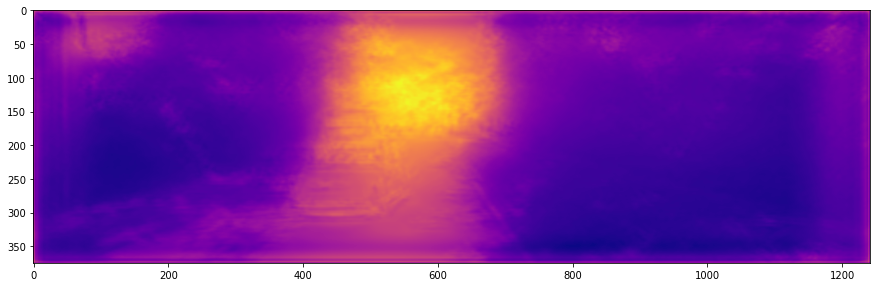

In [ ]:
disp_to_img = skimage.transform.resize(disp[0].squeeze(), [375, 1242], mode='constant')
plt.imshow(disp_to_img, cmap='plasma')

Save a color image

In [ ]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_test_output.png'), disp_to_img, cmap='plasma')

Save all test images

In [ ]:
for i in range(disp.shape[0]):
    disp_to_img = skimage.transform.resize(disp[i].squeeze(), [375, 1242], mode='constant')
    plt.imsave(os.path.join(dict_parameters_test.output_directory,
               'pred_'+str(i)+'.png'), disp_to_img, cmap='plasma')

Save a grayscale image

In [ ]:
plt.imsave(os.path.join(dict_parameters_test.output_directory,
                        dict_parameters_test.model_path.split('/')[-1][:-4]+'_gray.png'), disp_to_img, cmap='gray')

In [ ]:
!zip 27Jan23_T80_VT20_E20_run.zip /content/data/output/*.* /content/data/test/left/image_02/data/*.* /content/data/models/*.*

  adding: content/data/output/disparities.npy (deflated 14%)
  adding: content/data/output/disparities_pp.npy (deflated 14%)
  adding: content/data/output/monodepth_resnet18_001_cpt_gray.png (deflated 0%)
  adding: content/data/output/monodepth_resnet18_001_cpt_test_output.png (deflated 0%)
  adding: content/data/output/pred_0.png (deflated 0%)
  adding: content/data/output/pred_10.png (deflated 0%)
  adding: content/data/output/pred_11.png (deflated 0%)
  adding: content/data/output/pred_12.png (deflated 0%)
  adding: content/data/output/pred_13.png (deflated 0%)
  adding: content/data/output/pred_14.png (deflated 0%)
  adding: content/data/output/pred_15.png (deflated 0%)
  adding: content/data/output/pred_16.png (deflated 0%)
  adding: content/data/output/pred_17.png (deflated 0%)
  adding: content/data/output/pred_18.png (deflated 0%)
  adding: content/data/output/pred_19.png (deflated 0%)
  adding: content/data/output/pred_1.png (deflated 0%)
  adding: content/data/output/pred_2.p

In [ ]:
!du -kh *.zip

252M	27Jan23_Resnet18_T80_VT20_E20_run.zip
